In [1]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import time
import os
import glob

### OPTION 1: All files in folder

In [10]:
def get_positions_from_files(folder, timesteps, n_bodies):
    # position arrays
    n_timesteps = len(timesteps)
    x = [[None] * (n_timesteps) for _ in range(n_bodies)]
    y = [[None] * (n_timesteps) for _ in range(n_bodies)]
    z = [[None] * (n_timesteps) for _ in range(n_bodies)]
    
    # populate position arrays
    index = 0
    for timestep in timesteps:
        df = pd.read_csv(folder + "/t_%s.csv"%(str(timestep)))
        x_tmp = list(df["x"])
        y_tmp = list(df["y"])
        z_tmp = list(df["z"])
        
        for n in range(n_bodies):
            x[n][index] = x_tmp[n]
            y[n][index] = y_tmp[n]
            z[n][index] = z_tmp[n]  
        index += 1
      
    bodies = df["body"]
    return x, y, z, bodies

In [11]:
# from .out file
folder = "positions_250_years_init_01_01_1750"
n_days_total = 91250
step_save = 5
n_bodies = 9

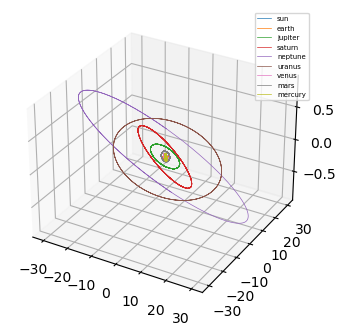

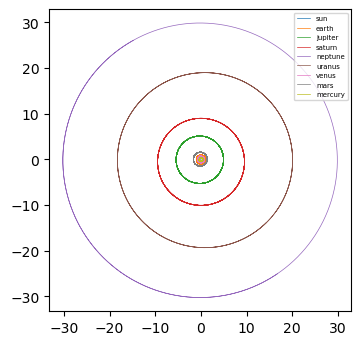

In [12]:
x, y, z, bodies = get_positions_from_files(folder, list(range(0, n_days_total + 1, step_save)), n_bodies)

ax = plt.figure(dpi = 100).add_subplot(projection='3d')
for i in range(n_bodies):
    ax.plot(x[i], y[i], z[i], label = bodies[i], linewidth = 0.5)
ax.legend(fontsize="5")
plt.show()

fig = plt.figure(dpi = 100)
ax = plt.subplot()
ax.set_aspect("equal")
for i in range(n_bodies):
    ax.plot(x[i], y[i], label = bodies[i], linewidth = 0.5)
ax.legend(fontsize="5")
plt.show()

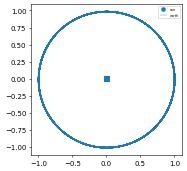

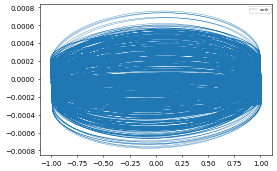

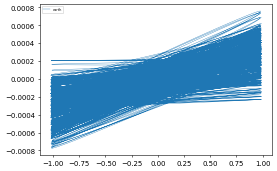

In [22]:
i_body = 1

fig = plt.figure(dpi = 50)
ax = plt.subplot()
ax.set_aspect("equal")
ax.scatter(x[0], y[0], label = bodies[0], linewidth = 0.5)
ax.plot(x[i_body], y[i_body], label = bodies[i_body], linewidth = 0.5)
ax.legend(fontsize="5")
plt.show()

fig = plt.figure(dpi = 50)
ax = plt.subplot()
# ax.set_aspect("equal")
plt.plot(x[i_body], z[i_body], label = bodies[i_body], linewidth = 0.5)
ax.legend(fontsize="5")
plt.show()

fig = plt.figure(dpi = 50)
ax = plt.subplot()
# ax.set_aspect("equal")
plt.plot(y[i_body], z[i_body], label = bodies[i_body], linewidth = 0.5)
ax.legend(fontsize="5")
plt.show()

### OPTION 2: only a selection of files from folder

In [7]:
def get_positions_from_files_range(folder, n_bodies, timestep_min, timestep_max, interval):
    # position arrays
    n_timesteps = math.ceil((timestep_max - timestep_min + 1)/interval)
    x = [[None] * (n_timesteps) for _ in range(n_bodies)]
    y = [[None] * (n_timesteps) for _ in range(n_bodies)]
    z = [[None] * (n_timesteps) for _ in range(n_bodies)]
    
    # populate position arrays
    index = 0
    for timestep in range (timestep_min, timestep_max + 1, interval):
        df = pd.read_csv(folder + "/t_%s.csv"%(str(timestep)))
        x_tmp = list(df["x"])
        y_tmp = list(df["y"])
        z_tmp = list(df["z"])
        
        for n in range(n_bodies):
            x[n][index] = x_tmp[n]
            y[n][index] = y_tmp[n]
            z[n][index] = z_tmp[n]  
        index += 1
      
    bodies = df["body"]
    return x, y, z, bodies

In [8]:
# from .out file
folder = "positions_250_years_init_01_01_1750"
n_days_total = 91250 # = 365 * 250
step_save = 5
n_bodies = 9

# depending on what we want to display
timestep_min = 0
timestep_max = 365 * 50 # we know that for this simulation, 1 timestep was 1 day so 365 timesteps is 1 year
interval =  step_save # every 5 timesteps (wasn t svade for every timestep anyway), so every 5 days in this case

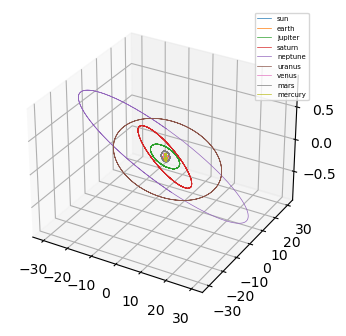

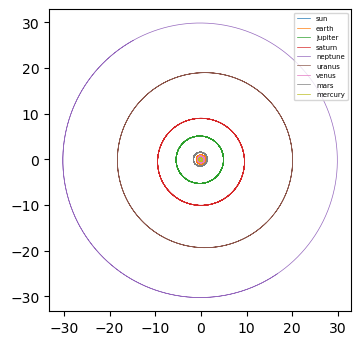

In [9]:
# x, y, z, bodies = get_positions_from_files_range(folder, n_bodies, timestep_min, timestep_max, interval)

ax = plt.figure(dpi = 100).add_subplot(projection='3d')
for i in range(n_bodies):
    ax.plot(x[i], y[i], z[i], label = bodies[i], linewidth = 0.5)
ax.legend(fontsize="5")
plt.show()

fig = plt.figure(dpi = 100)
ax = plt.subplot()
ax.set_aspect("equal")
for i in range(n_bodies):
    ax.plot(x[i], y[i], label = bodies[i], linewidth = 0.5)
ax.legend(fontsize="5")
plt.show()